In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
print(tf.__version__)
print(keras.__version__)

2.6.0
2.6.0


In [3]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [4]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [5]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [6]:
class_names[y_train[0]]

'Coat'

In [7]:
model = keras.models.Sequential([
  keras.layers.Flatten(input_shape=[28,28]),
  keras.layers.Dense(300, activation="relu"),
  keras.layers.Dense(100, activation="relu"),
  keras.layers.Dense(10, activation="softmax")                               
])

In [8]:
# displays all of the model's layers, including each layers name, its output shape, and its number of parameters
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


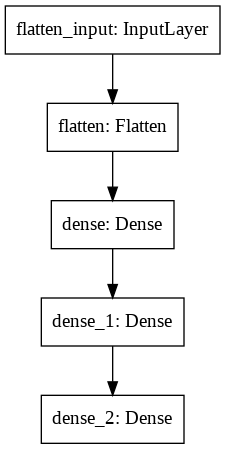

In [9]:
keras.utils.plot_model(model)

In [11]:
# access the layers of a model
for layer in model.layers:
    print(layer.name)

flatten
dense
dense_1
dense_2


In [12]:
# access the weights and biases of a layer in a model
weights, biases = model.layers[1].get_weights()

In [15]:
print(weights)
print(weights.shape)

[[ 0.05573002  0.06504869 -0.03707788 ...  0.00375076 -0.01328634
   0.03442597]
 [-0.0302269  -0.03969531  0.03278051 ...  0.06535593  0.01947749
  -0.06914196]
 [ 0.00281684 -0.01892455  0.02556371 ...  0.0001714   0.00346561
   0.07012029]
 ...
 [-0.03575102  0.02696622  0.03887346 ... -0.01247706  0.03971472
  -0.04799977]
 [-0.02676399 -0.04100176 -0.0569803  ... -0.04980812  0.04204645
   0.0436061 ]
 [-0.07090847  0.00860245  0.06979327 ... -0.06693228  0.00507066
  -0.01889663]]
(784, 300)


In [16]:
print(biases)
print(biases.shape)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
(300,)


After creating the model, you have to specify the optimizer and loss function to use.

In [17]:
# this specific loss function is used because we have sparse labels and the classes are exclusive
# optimizer means that the model will be trained using Stochastic Gradient Descent
# we want to measure the models accuracy during training
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [18]:
# instead of passing in a validation set, you could set validation_split to the ratio of the training set that you want Keras to use for validation
# the fit method returns a History object containing:
#   1. the training parameters (history.params),
#   2. the list of epochs it went through (history.epoch)
#   3. and, most importantly, a dictionary containing the loss and extra metrics it measured at the end of each epochs (history.history)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.7067 - accuracy: 0.7682 - val_loss: 0.4976 - val_accuracy: 0.8302
Epoch 2/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4877 - accuracy: 0.8292 - val_loss: 0.4381 - val_accuracy: 0.8526
Epoch 3/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4427 - accuracy: 0.8460 - val_loss: 0.4535 - val_accuracy: 0.8422
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4162 - accuracy: 0.8530 - val_loss: 0.3854 - val_accuracy: 0.8680
Epoch 5/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3958 - accuracy: 0.8610 - val_loss: 0.3807 - val_accuracy: 0.8706
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3793 - accuracy: 0.8662 - val_loss: 0.3856 - val_accuracy: 0.8668
Epoch 7/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3657 - accuracy: 0.8699 - val_loss: 0.3864 - val_accuracy:

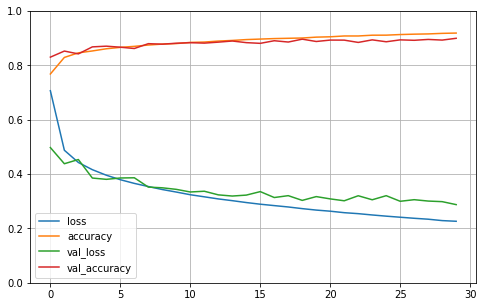

In [19]:
# plot the mean training loss and accuracy measured over each epoch
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()
# if you aren't happy with your models performance then you can adjust the models hyper-parameters and parameters

If the training set was very skewed, with some classes being overrepresented and others underrepresented, it would be useful to set the `class_weight` argument when calling the `fit()` method.

In [21]:
# once you are satisfied with your models performance on the validation set, you want to evaluate it on the test set
model.evaluate(X_test, y_test)
# typically, you will get slightly worse performance on the test set since the hyper-parameters are tuned on the validation set

313/313 [==============================] - 1s 2ms/step - loss: 63.2592 - accuracy: 0.8500


[63.259239196777344, 0.8500000238418579]

In [22]:
# making predictions
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)